<a href="https://colab.research.google.com/github/YunjiSon/2022spring/blob/main/sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#x축이 시간이다. > 시간의 함수. Y축은 강도 파형이 되는 것.
#> 이걸 signal이라고 함. (환율의 변화 이런거 같은거, 빛 같은고)

digital (불연속 적이고 하나씩 quantize 되는 것) <> analog (연속적인거)


이 아날로그를 디지털로 바꿔줘야 컴퓨터에서 사용 가능.
>digital signal process

quantize란 신호가 있을 때 그걸 등(같은) 간격으로 자르는 것.

1초에 몇 등분으로 나눌 것인가. 그게 sampling rate.
즉, 100 등분으로 나누면 100hz. 

1초 짜리가 10,000hz를 가지면 10,000개의 값을 가져야 하는것. (y축 값)

frequency 도 hz인데 얘는 주파수.

주파수가 높은건 높은 소리. (1초에 왔다갔다가 많은 것)

주파수: 초당 몇번 반복

남자면 100-150/ 여자면 200-250 hz

<Phasor>
sine 곡선
-sampling rate, frequency, amplitude(위아래로 크기가 얼마나 될런지), duration(총 sec)

Fourier: 모든 시그널은 여러가지 다양한 사인 곡선들의 결합으로 이루어져있다고 봄.

어떤 복잡한 곡선도 사인 곡선으로 나타낼 수 있다. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [2]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
phase = 0  # phase, radian

phase는 그 sine 곡선을 각도와 파이 이런걸로 봤을 때.
시작은 0도로 보고, 한바퀴 도는 거를 (위 아래 한 번씩) 360도, 2파이로 봄. 

In [3]:
# generate sample ticks
#전체 duration 동안 시간을 자를 수 있는 tick 을 만들어야 함. 
nSamp = sr * dur
samples = np.arange(1, nSamp+1) #1, 2, 3, 4;;;5000까지

In [4]:
# convert samples to time
t = samples/sr #1/10000, 2/10000...5,000/10,000

In [5]:
# convert time to angle in radian
theta0 = t * 2*np.pi * freq #sin(radian) 이렇게 들어가야 함. 

In [6]:
# shift angle by phase
theta = theta0 + phase

In [7]:
# generate signal by sin-phasor
s = amp * np.sin(theta)

Text(0, 0.5, 'real')

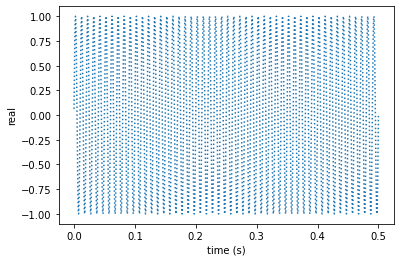

In [8]:
# plot the entire signal
plt.plot(t, s, ':')
plt.xlabel('time (s)')
plt.ylabel('real')

In [ ]:
plt.plot(theta,s,)

Text(0, 0.5, 'real')

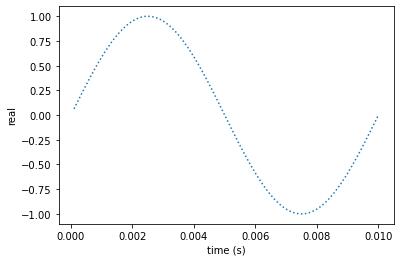

In [9]:
# plot a certain of signals
sampleRng = np.arange(0,100)
plt.plot(t[sampleRng], s[sampleRng], ':')
plt.xlabel('time (s)')
plt.ylabel('real')

In [10]:
ipd.Audio(s, rate=10000)

In [11]:
def phasor_sine(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  s = amp * np.sin(theta)
  return s, t, theta

In [12]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0 #지금 이게 a음임. 배수 할 때마다 옥타브가 달라짐. 
s, t, theta = phasor_sine(amp, sr, dur, freq, phase)
ipd.Audio(s, rate=sr)

sine 에다가 theta 값 대신에 
e의 itheta 승 넣을 수도. 이때 i는 허수 i

>입체로 생기는 sine 곡선이 됨. 


In [ ]:
# generate signal by sin-phasor
c = amp * np.exp(theta*1j) #여기에 np.exp가 e가 됨. 